In [5]:
from mendeleev import element
#import pymatgen.core as mg
import matplotlib.pyplot as plt
#import matplotlib as mpl
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import quadpy
from tqdm.notebook import tqdm, trange
import time    # to be used in loop iterations
from joblib import Parallel, delayed, parallel_backend
from scipy import integrate
import time
from datetime import timedelta
import plotly as plotly
import plotly.express as px
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True)  
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.graph_objects as go
import scipy.signal
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

import os

def crystal(i):
    switcher={
        45: "Li", 
        44: "Cu",
        43: "Mn",
        42: "Al",            
        41: "Au",            
        40: "Ca",      
        39: "Cr",        
        38: "Fe",            
        37: "Ge",            
        36: "Ir",      
        35: "Pd",        
        34: "Pt",            
        33: "Ru",            
        32: "Si",      
        31: "Tc",
        30: "Ti",
        29: "V",
        28: "W",
        27: "Mg",
        26: "Co",
        25: "Sc", 
        24: "Hg",
        23: "Mo", 
        22: "Os",
        21: "Rh",
        20: "Ag",
        19: "Cd",
        18: "Hf",
        17: "K",
        16: "Na",
        15: "Nb",
        14: "Ni",
        13: "Re",
        12: "Sb",
        11: "Sr",
        10: "Ta",
        9: "Y",
        8: "Zr",
        7: "Ba",
        6: "Cs",
        5: "In",
        4: "Rb",
        3: "Sn",
        2: "Pb",
        1: "Tl",
    }
    return switcher.get(i,"Invalid crystal")

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  
import plotly.io as pio
pio.renderers.default = 'iframe'

In [6]:
# element('Si').ionic_radii[0].ionic_radius

In [7]:
suffix = "TETRA"
df_intch=pd.read_csv("./NotIntCharge_"+suffix+".csv") #ok
df_bader=pd.read_csv("./ALL_BADER_"+suffix+".csv") #ok
df_lattice=pd.read_csv("./ALL_LATTICE.csv") #ok
df_structural=pd.read_csv("./ALL_STRUCTURAL.csv") #ok
df_valence=pd.read_csv("./ALL_VALENCE_OCTA.csv") #ok

In [8]:
data=[]
crystalnames_df=[]
    
counter=0
for pp in range (1,46):
    
    if pp==7 or pp==26 or pp==38 or pp==14 or pp==28 or pp==18 or pp==24:
        continue
        
    if pp==6 or pp==32 or pp==12:
        continue
        
    counter+=1
    
    crystalname=crystal(pp)

    columnname=crystalname+'_'+suffix+'_RDF'
    
    crystalnames_df.append(crystalname)

    print(columnname)
    
    RDF = df_intch[columnname]
    
    # print(len(RDF))

    BADER= df_bader.loc[counter-1]
    LATTICE= df_lattice.loc[counter-1]
    STRUCTURAL=df_structural.loc[pp-1]
    VALENCE=df_valence.loc[pp-1]
    
    RDF = np.asarray(RDF)
    # RDF = RDF[np.logical_not(np.isnan(RDF))]
    RDF =np.roll(RDF, 50)
    
    MAX_rdf = np.amax(RDF)
    # MIN_rdf = np.amin(RDF)
            
    # ------ signal info

    peaks_RDF, peaks_RDF_properties = find_peaks(RDF, height=0)
    # print("\n peaks_RDF, peaks_RDF_properties",peaks_RDF, peaks_RDF_properties)
    peaks_RDF_widths=scipy.signal.peak_widths(RDF, peaks_RDF, rel_height=0.5, prominence_data=None, wlen=None)
    # print("\n peaks_RDF_widths",peaks_RDF_widths)

    all_heights=np.asarray(peaks_RDF_properties['peak_heights'])
    max_Height=max(all_heights)
    index=np.where(all_heights==max_Height)

    peak_width=peaks_RDF_widths[0][index]
    # print("\n peak_width",peak_width)
    # peak1_width_half_height=peaks_RDF_widths[1][0]
    # print("\n peak1_width_half_height",peak1_width_half_height)

    # peak2_pos=Rr_axis[peaks_RDF][1]
    # peak2_height=peaks_RDF_properties['peak_heights'][1]
    # peak2_width=peaks_RDF_widths[0][1]
    # peak2_width_half_height=peaks_RDF_widths[1][1]

    
    row=[element(crystalname).name,
        element(crystalname).atomic_number,
        element(crystalname).atomic_radius,
        element(crystalname).atomic_volume,
        element(crystalname).atomic_weight,
        element(crystalname).dipole_polarizability,
        element(crystalname).period,
        element(crystalname).boiling_point,
        element(crystalname).c6,
        element(crystalname).covalent_radius_bragg,
        element(crystalname).covalent_radius_cordero,
        element(crystalname).covalent_radius_pyykko,
        element(crystalname).covalent_radius_pyykko_double,
        element(crystalname).covalent_radius_pyykko_triple,
        element(crystalname).c6_gb,
        element(crystalname).density,
        element(crystalname).dipole_polarizability_unc,
        element(crystalname).electron_affinity,
        element(crystalname).evaporation_heat,
        element(crystalname).fusion_heat,
        element(crystalname).gas_basicity,
        element(crystalname).glawe_number,
        element(crystalname).heat_of_formation,
        element(crystalname).ionic_radii[0].ionic_radius, # there is also [1]
        element(crystalname).melting_point,
        element(crystalname).mendeleev_number,
        element(crystalname).metallic_radius,
        element(crystalname).metallic_radius_c12,
        element(crystalname).proton_affinity,
        element(crystalname).specific_heat,
        element(crystalname).thermal_conductivity,
        element(crystalname).vdw_radius,
        element(crystalname).vdw_radius_alvarez,
        element(crystalname).vdw_radius_batsanov,
        element(crystalname).vdw_radius_bondi,
        element(crystalname).vdw_radius_dreiding,
        element(crystalname).vdw_radius_mm3,
        element(crystalname).vdw_radius_rt,
        element(crystalname).vdw_radius_truhlar,
        element(crystalname).vdw_radius_uff,
        VALENCE['VALENCE'],
        BADER['Ch(M)'], #df_bader_OCTA['Ch(M)'],
        BADER['Ch(H)'],#df_bader_OCTA['Ch(H)'], #should address to the right element when calling 
        BADER['Rad_M'],#df_bader_OCTA['Rad_M'],
        BADER['Rad_H'],#df_bader_OCTA['Rad_H'],
        BADER['V_M'],#df_bader_OCTA['V_M'],
        BADER['V_H'],
        LATTICE['Lat'],
        STRUCTURAL['B.M.'],
        STRUCTURAL['Y.M.'],
        STRUCTURAL['S.M.'],
        STRUCTURAL['P.R.'],      
        peak_width[0],
        MAX_rdf,     
        ]
    
    data.append(row)
    
    df = pd.DataFrame(data, columns = ['Name', 'Atomic Number', 'Atomic Radius', 'Atomic Volume','atomic_weight',
        'dipole_polarizability',
        'period',
        'boiling_point',
        'c6',
        'covalent_radius_bragg',
        'covalent_radius_cordero',
        'covalent_radius_pyykko',
        'covalent_radius_pyykko_double',
        'covalent_radius_pyykko_triple',
        'c6_gb',
        'density',
        'dipole_polarizability_unc',
        'electron_affinity',
        'evaporation_heat',
        'fusion_heat',
        'gas_basicity',
        'glawe_number',
        'heat_of_formation',
        'ionic_radii',
        'melting_point',
        'mendeleev_number',
        'metallic_radius',
        'metallic_radius_c12',                       
        'proton_affinity',
        'specific_heat',                          
        'thermal_conductivity',
        'vdw_radius',
        'vdw_radius_alvarez',
        'vdw_radius_batsanov',
        'vdw_radius_bondi',
        'vdw_radius_dreiding',
        'vdw_radius_mm3',
        'vdw_radius_rt',
        'vdw_radius_truhlar',
        'vdw_radius_uff',
        'VALENCE',
        'Ch(M)',
        'Ch(H)',
        'Rad_M',
        'Rad_H',
        'V_M',
        'V_H',
        'Lat',
        'BULKM',
        'YOUNGM', 
        'SHEARM',
        'POISSONR',
        'peak_width',
        'MAX_rdf',
      ])

    # for ii in range (0,174):
    #     print(RDF[ii])
    #     df.insert(len(df.columns),'**RDF_'+str(ii)+'**',RDF[ii])

df

    


Tl_TETRA_RDF
Pb_TETRA_RDF
Sn_TETRA_RDF
Rb_TETRA_RDF
In_TETRA_RDF
Zr_TETRA_RDF
Y_TETRA_RDF
Ta_TETRA_RDF
Sr_TETRA_RDF
Re_TETRA_RDF
Nb_TETRA_RDF
Na_TETRA_RDF
K_TETRA_RDF
Cd_TETRA_RDF
Ag_TETRA_RDF
Rh_TETRA_RDF
Os_TETRA_RDF
Mo_TETRA_RDF
Sc_TETRA_RDF
Mg_TETRA_RDF
V_TETRA_RDF
Ti_TETRA_RDF
Tc_TETRA_RDF
Ru_TETRA_RDF
Pt_TETRA_RDF
Pd_TETRA_RDF
Ir_TETRA_RDF
Ge_TETRA_RDF
Cr_TETRA_RDF
Ca_TETRA_RDF
Au_TETRA_RDF
Al_TETRA_RDF
Mn_TETRA_RDF
Cu_TETRA_RDF
Li_TETRA_RDF


,Name,Atomic Number,Atomic Radius,Atomic Volume,atomic_weight,dipole_polarizability,period,boiling_point,c6,covalent_radius_bragg,...,Rad_H,V_M,V_H,Lat,BULKM,YOUNGM,SHEARM,POISSONR,peak_width,MAX_rdf
0,Thallium,81,190.0,17.20,204.380000,50.0000,6,1730.00,NaN,190.0,...,1.465705,203.888848,48.841286,5.002120,296.44047,41.28377,14.68947,0.40522,1.151142,0.000797
1,Lead,82,180.0,18.30,207.200000,47.0000,6,2013.00,NaN,NaN,...,1.508106,210.276691,50.398776,5.069333,407.73666,-233.36752,-65.40753,0.78395,1.110279,0.000782
2,Tin,50,145.0,16.30,118.710000,53.0000,5,2543.00,659.0,140.0,...,1.480478,185.886156,49.321816,4.872865,439.46883,216.13070,76.94449,0.40446,4.709087,0.053449
3,Rubidium,37,235.0,55.90,85.467800,319.8000,5,961.00,4769.0,225.0,...,2.040784,419.691058,165.045977,6.896321,33.59768,26.82293,9.93748,0.34958,1.382962,0.000286
4,Indium,49,155.0,15.70,114.818000,65.0000,5,2353.00,779.0,NaN,...,1.465630,180.368311,50.313394,4.824002,343.24574,95.77966,33.29902,0.43818,4.759745,0.056079
5,Zirconium,40,155.0,14.10,91.224000,112.0000,5,4650.00,NaN,NaN,...,1.311776,152.153758,41.626603,4.543623,930.20851,823.87718,305.58726,0.34802,4.696433,0.103792
6,Yttrium,39,180.0,19.80,88.905840,162.0000,5,3611.00,NaN,NaN,...,1.456762,205.789103,56.499096,5.045803,392.16302,562.49297,223.36647,0.25913,4.305434,0.099258
7,Tantalum,73,145.0,10.90,180.947880,74.0000,6,5698.00,NaN,NaN,...,1.224397,127.370855,31.141105,4.240945,1740.99067,2258.63998,1029.38703,0.09708,4.842529,0.102275
8,Strontium,38,200.0,33.70,87.620000,197.2000,5,1657.00,3175.0,195.0,...,1.699554,312.108926,95.041288,5.934284,130.09873,168.15819,66.11013,0.27180,3.878054,0.084323
9,Rhenium,75,135.0,8.85,186.207000,62.0000,6,5900.00,NaN,NaN,...,1.077999,100.422245,21.926330,3.936890,3501.73236,4582.32578,1787.59034,0.28170,5.064890,0.090493


In [9]:
# R_cont=[]
# for nx in range (0,101):
#     for ny in range(0,101):
#         for nz in range(0,101):
            
#             R_cont.append(np.sqrt(nx**2+ny**2+nz**2))

# R_cont=np.array(R_cont)
# R=R_cont.astype(int)
# Rr=np.unique(R_cont.ravel()) 
# Rrmax=max(Rr)
# nr = np.bincount(R)
# Rr_axis=np.linspace(0,Rrmax,len(nr))

In [10]:
# #!pip install pymatgen
# #import pymatgen.core as mg
# #df['ionic_radii']
# print(df[['Name','peak1_pos','peak1_height','peak2_pos','peak2_height']])

In [11]:
df.shape

(35, 54)

In [12]:
df.describe()

,Atomic Number,Atomic Radius,Atomic Volume,atomic_weight,dipole_polarizability,period,boiling_point,c6,covalent_radius_bragg,covalent_radius_cordero,...,Rad_H,V_M,V_H,Lat,BULKM,YOUNGM,SHEARM,POISSONR,peak_width,MAX_rdf
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,17.000000,16.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,42.400000,153.571429,15.139714,100.133901,94.112929,4.714286,3107.892857,1444.235294,164.500000,153.428571,...,1.343006,146.054077,52.309432,4.475845,1312.910313,1052.470946,318.835810,0.317219,4.538378,0.074536
std,22.874594,26.584256,10.841822,59.520351,67.169918,1.016668,1448.574819,1321.426101,28.118796,22.595270,...,0.354619,77.363035,42.285378,0.780386,1119.393715,2530.872739,945.735429,0.514872,1.269389,0.033151
min,3.000000,125.000000,7.100000,6.940000,26.140000,2.000000,961.000000,253.000000,135.000000,120.000000,...,0.942638,41.523050,18.714500,3.524944,33.597680,-6413.446010,-2318.563970,-2.429500,1.110279,0.000286
25%,23.500000,135.000000,8.695000,51.468800,53.500000,4.000000,1885.000000,602.000000,140.000000,140.000000,...,1.068094,97.498464,22.779713,3.927058,378.793385,59.623015,13.955765,0.269120,4.702760,0.057623
50%,41.000000,145.000000,10.800000,92.906370,71.200000,5.000000,3080.000000,832.000000,155.000000,146.000000,...,1.224953,124.290160,38.441382,4.240945,930.208510,505.054710,88.956670,0.348020,5.010381,0.083542
75%,49.500000,160.000000,16.000000,116.764000,99.000000,5.000000,4136.500000,1518.000000,180.250000,165.000000,...,1.494292,170.371183,54.598106,4.848434,2292.146765,1960.611255,551.103690,0.404840,5.155876,0.098985
max,82.000000,235.000000,55.900000,207.200000,319.800000,6.000000,5900.000000,4769.000000,225.000000,220.000000,...,2.392302,419.691058,166.239056,6.896321,3698.848390,6628.793110,2394.791560,0.944070,5.599272,0.114307


In [13]:
df.head()

,Name,Atomic Number,Atomic Radius,Atomic Volume,atomic_weight,dipole_polarizability,period,boiling_point,c6,covalent_radius_bragg,...,Rad_H,V_M,V_H,Lat,BULKM,YOUNGM,SHEARM,POISSONR,peak_width,MAX_rdf
0,Thallium,81,190.0,17.2,204.3800,50.0,6,1730.0,NaN,190.0,...,1.465705,203.888848,48.841286,5.002120,296.44047,41.28377,14.68947,0.40522,1.151142,0.000797
1,Lead,82,180.0,18.3,207.2000,47.0,6,2013.0,NaN,NaN,...,1.508106,210.276691,50.398776,5.069333,407.73666,-233.36752,-65.40753,0.78395,1.110279,0.000782
2,Tin,50,145.0,16.3,118.7100,53.0,5,2543.0,659.0,140.0,...,1.480478,185.886156,49.321816,4.872865,439.46883,216.13070,76.94449,0.40446,4.709087,0.053449
3,Rubidium,37,235.0,55.9,85.4678,319.8,5,961.0,4769.0,225.0,...,2.040784,419.691058,165.045977,6.896321,33.59768,26.82293,9.93748,0.34958,1.382962,0.000286
4,Indium,49,155.0,15.7,114.8180,65.0,5,2353.0,779.0,NaN,...,1.465630,180.368311,50.313394,4.824002,343.24574,95.77966,33.29902,0.43818,4.759745,0.056079


In [14]:
df.to_csv('TETRA_DATASET.csv',index=False)

X=df.drop(columns = 'Name',axis=1)
X.isna().sum()

Atomic Number                     0
Atomic Radius                     0
Atomic Volume                     0
atomic_weight                     0
dipole_polarizability             0
period                            0
boiling_point                     0
c6                               18
covalent_radius_bragg            19
covalent_radius_cordero           0
covalent_radius_pyykko            0
covalent_radius_pyykko_double     0
covalent_radius_pyykko_triple     5
c6_gb                             0
density                           0
dipole_polarizability_unc         0
electron_affinity                 3
evaporation_heat                  1
fusion_heat                       0
gas_basicity                     24
glawe_number                      0
heat_of_formation                 0
ionic_radii                       0
melting_point                     0
mendeleev_number                  0
metallic_radius                   0
metallic_radius_c12               0
proton_affinity             

# -------------------------------

# SOME OLD ANALYSIS

In [119]:
# give to NaN some number which is always the same 
X_mdf=X

X_mdf=X.dropna(axis='columns')

# print("DISREGARDING\n",X_mdf.iloc[:, 6:27])
X_mdf=X_mdf.drop(X_mdf.iloc[:, 4:5], axis = 1)
X_mdf=X_mdf.drop(X_mdf.iloc[:, 5:27], axis = 1)
X_mdf.isna().sum()

Atomic Number              0
Atomic Radius              0
Atomic Volume              0
atomic_weight              0
period                     0
peak1_pos                  0
peak1_height               0
peak1_width                0
peak1_width_half_height    0
peak2_pos                  0
peak2_height               0
peak2_width                0
peak2_width_half_height    0
Ch(M)                      0
Ch(H)                      0
Rad_M                      0
Rad_H                      0
V_M                        0
V_H                        0
BULKM                      0
YOUNGM                     0
SHEARM                     0
POISSONR                   0
dtype: int64

In [120]:
print(X_mdf.dtypes)

scaler = StandardScaler()

scaler.fit(X_mdf)

standardized_data = scaler.transform(X_mdf)

X_mdf_std = standardized_data

print(X_mdf_std.mean())
print(X_mdf_std.std())

print("Column 1 mean,",X_mdf_std[:,0].mean())
print("Column 2 mean,",X_mdf_std[:,1].mean())
print("Column 1 var,",X_mdf_std[:,1].var())
print("Row 1 mean,",X_mdf_std[0,:].mean())
print("Row 1 var,",X_mdf_std[0,:].var())



Atomic Number                int64
Atomic Radius              float64
Atomic Volume              float64
atomic_weight              float64
period                       int64
peak1_pos                  float64
peak1_height               float64
peak1_width                float64
peak1_width_half_height    float64
peak2_pos                  float64
peak2_height               float64
peak2_width                float64
peak2_width_half_height    float64
Ch(M)                      float64
Ch(H)                      float64
Rad_M                      float64
Rad_H                      float64
V_M                        float64
V_H                        float64
BULKM                      float64
YOUNGM                     float64
SHEARM                     float64
POISSONR                   float64
dtype: object
-2.5376526277146434e-17
1.0
Column 1 mean, 1.0785023667787235e-16
Column 2 mean, -4.980143281889988e-16
Column 1 var, 1.0
Row 1 mean, 0.25941104850098334
Row 1 var, 1.55648893613726

In [121]:
pca = PCA()

X_mdf_std_T=X_mdf_std.T

pca.fit(X_mdf_std_T)
print(pca.components_.T.shape)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("Minimum number of dimensions to preserve 95% of training set variance: ",d)
d=np.arange(1,24,1,dtype='int')

print(cumsum,len(cumsum),d,len(d)) 

#plt.plot(d,cumsum,'b-o')
#plt.style.use('ggplot')
#plt.xlabel('d')
#plt.ylabel('Explained Variance Ratio')
#plt.show()

EXPVARRAT_DF = {'Explained Variance Ratio':cumsum,
         'Dimension':d}
 
# Create DataFrame
EXPVARRAT_DF = pd.DataFrame(EXPVARRAT_DF)
import plotly.express as px
#df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(EXPVARRAT_DF, x='Dimension', y='Explained Variance Ratio')
fig.update_layout(
    #height=800,
    title_text='OCTAHEDRAL CASE: Min. number of dimensions to preserve 95% of training set variance: 2'
)

fig.show()
#plotly.offline.plot(fig, filename='/Users/dariomassa/Documents/PHD_NCBJ/FCC_new/SPIN_CHECK/PCA_OUT_MINDIM_'+suffix+'.html')

(35, 23)
Minimum number of dimensions to preserve 95% of training set variance:  9
[0.2218009  0.40962181 0.58340103 0.69321973 0.77566045 0.8348412
 0.89146661 0.93312906 0.95774606 0.97651855 0.98725224 0.99071346
 0.99364437 0.99556961 0.99715089 0.99805941 0.99883181 0.99942067
 0.99977092 0.99990832 0.99999836 1.         1.        ] 23 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 23


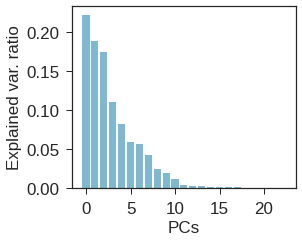

In [122]:
pca.get_covariance()

explained_variance=pca.explained_variance_ratio_
explained_variance

with plt.style.context('seaborn-white'):
    plt.style.use('seaborn-ticks')
    plt.figure(figsize=(5, 6))
    # plt.rcParams.update({'font.size': 50})
    plt.bar(range(23), explained_variance, alpha=0.5, align='center')
    plt.ylabel('Explained var. ratio', fontsize=17)
    plt.xlabel('PCs', fontsize=17)
    # plt.legend(loc='best')
    plt.tight_layout()
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.subplots_adjust(left=0.28, right=0.9, top=0.7, bottom=0.28)
    
plt.savefig('Explained_Variance.pdf')

In [124]:
C1=pca.components_.T[:, 0]
C2=pca.components_.T[:, 1]

PC_COMPS_2D = {
'PC1':C1,
'PC2':C2,
}

df_COMPS_2D=pd.DataFrame.from_dict(PC_COMPS_2D)

crystalnames=[]

for pp in range (1,46):
    
    if pp==7 or pp==26 or pp==38 or pp==14 or pp==28 or pp==18 or pp==24:
        continue
        
    if pp==6 or pp==32 or pp==12:
        continue
        
    crystalnames.append(crystal(pp))



### TSNE

In [125]:
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

tsne_2 = TSNE(n_components=2, perplexity=5,init='random',learning_rate='auto')
X_embedded_2 = tsne_2.fit_transform(X_mdf_std)

tsne_2_EMB1=np.array(X_embedded_2[:,0])
tsne_2_EMB2=np.array(X_embedded_2[:,1])


### CLUSTER ANALYSIS

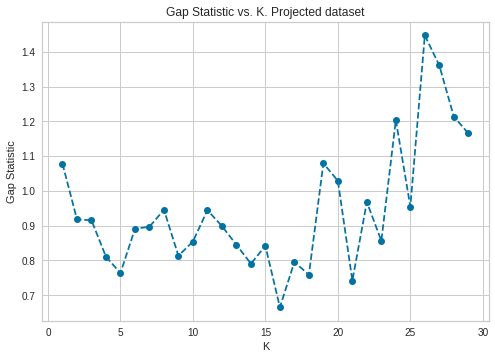

In [126]:
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def optimalK(data, nrefs, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(df_COMPS_2D, 5, 30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K. Projected dataset');

PROJECTED DATASET


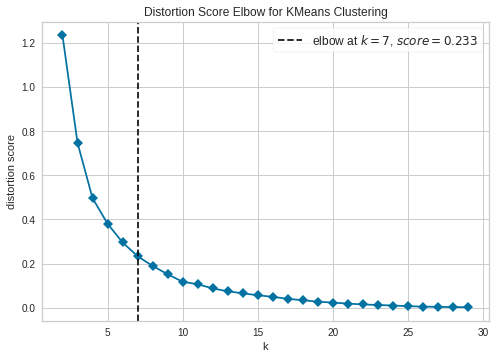

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= False)
visualizer.fit(df_COMPS_2D)        # Fit data to visualizer
print("PROJECTED DATASET")
visualizer.show() 

PROJECTED DATASET


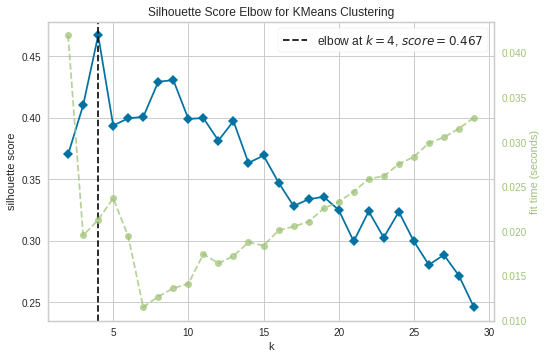

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [128]:
# Silhouette Score for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(df_COMPS_2D)        # Fit the data to the visualizer
print("PROJECTED DATASET")
visualizer.show()        # Finalize and render the figure

PROJECTED DATASET


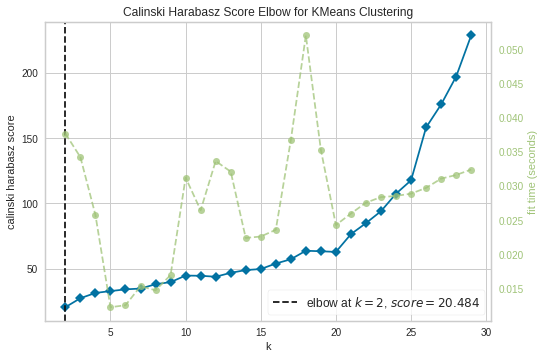

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [129]:
# Calinski Harabasz Score for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df_COMPS_2D)        # Fit the data to the visualizer
print("PROJECTED DATASET")
visualizer.show()

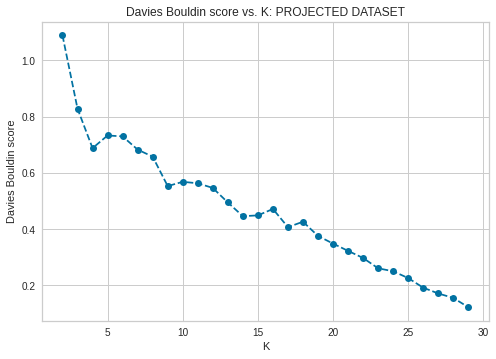

In [130]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(df_COMPS_2D, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K: PROJECTED DATASET');

In [131]:
# ///////////////////////////////////////////////////////////////

k_means_2_2DPCA=KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto').fit(df_COMPS_2D)
labels_2_2DPCA=k_means_2_2DPCA.labels_
print(labels_2_2DPCA)
print(len(labels_2_2DPCA))

gmix_2_2DPCA=GaussianMixture(n_components=2,random_state=0).fit_predict(df_COMPS_2D)
print(gmix_2_2DPCA)


from plotly.subplots import make_subplots

trace1=go.Scatter(x=PC_COMPS_2D['PC1'], y=df_COMPS_2D['PC2'],text=crystalnames,
                   mode="markers+text",marker=dict(symbol="circle",showscale=True,color=labels_2_2DPCA,colorbar=dict(title=".",x=0.44)),name="OI")

trace3=go.Scatter(showlegend=False,x=df_COMPS_2D['PC1'], y=df_COMPS_2D['PC2'],text=crystalnames,
                   mode="markers+text",marker=dict(symbol="circle",showscale=True,color=gmix_2_2DPCA,colorbar=dict(title=".")),name="OI")


fig=make_subplots(rows=1,cols=2,horizontal_spacing = 0.16,subplot_titles=('K-Means(n=2)',  'Gaussian-Mixture(n=2)'))
fig.update_annotations(font_size=34)

#fig = go.Figure(data=[trace1, trace2])
fig.append_trace(trace1, 1, 1)

fig.append_trace(trace3, 1, 2)

fig['layout'].update(xaxis1=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                 ))
fig['layout'].update(xaxis2=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                ))

fig['layout'].update(yaxis1=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                 ))
fig['layout'].update(yaxis2=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                               ))

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})#,'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.update_layout(xaxis=axis_template_x,yaxis=axis_template_y)
fig.update_traces(textposition='top center',textfont_size=28)
fig.update_traces(marker_showscale=False)
fig.update_layout(font={"size":34})
# fig.layout.coloraxis.colorbar.title = 'Lat(MH)/Lat(M)'
fig.update_layout(legend=dict(
    yanchor="top",
    y=-0.02,
    xanchor="right",
    x=0.5
))
axis_template_x=dict(
    linecolor='black',
    linewidth=2,
    title="PC1",
    tickfont = dict(size=34),
    titlefont = dict(size=34)
)
axis_template_x_2=dict(
    linecolor='black',
    linewidth=2,
    title="PC1",
    tickfont = dict(size=34),
    titlefont = dict(size=34)
)
axis_template_y=dict(
    linecolor='black',
    linewidth=2,
    tickfont = dict(size=34),
    titlefont = dict(size=34),
    title="PC2"
)
axis_template_y_2=dict(
    linecolor='black',
    linewidth=2,
    tickfont = dict(size=34),
    titlefont = dict(size=34),
    title="PC2"
)
fig.update_layout(xaxis=axis_template_x,yaxis=axis_template_y,xaxis2=axis_template_x_2,yaxis2=axis_template_y_2)
fig.show()
# plotly.offline.plot(fig, filename='/home/massad/Documents/Linux_PHD/SUPERCELLS/KM_cl2_tot_VS_GM_cl2_tot_onPCA.html')

[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0]
35
[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0]


In [132]:
# ///////////////////////////////////////////////////////////////

k_means_6_2DPCA=KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto').fit(df_COMPS_2D)
labels_6_2DPCA=k_means_6_2DPCA.labels_
print(labels_6_2DPCA)
print(len(labels_6_2DPCA))

gmix_6_2DPCA=GaussianMixture(n_components=6,random_state=0).fit_predict(df_COMPS_2D)
print(gmix_6_2DPCA)


from plotly.subplots import make_subplots

trace1=go.Scatter(x=PC_COMPS_2D['PC1'], y=df_COMPS_2D['PC2'],text=crystalnames,
                   mode="markers+text",marker=dict(symbol="circle",showscale=True,color=labels_6_2DPCA,colorbar=dict(title=".",x=0.44)),name="OI")

trace3=go.Scatter(showlegend=False,x=df_COMPS_2D['PC1'], y=df_COMPS_2D['PC2'],text=crystalnames,
                   mode="markers+text",marker=dict(symbol="circle",showscale=True,color=gmix_6_2DPCA,colorbar=dict(title=".")),name="OI")


fig=make_subplots(rows=1,cols=2,horizontal_spacing = 0.16,subplot_titles=('K-Means(n=6)',  'Gaussian-Mixture(n=6)'))
fig.update_annotations(font_size=34)

#fig = go.Figure(data=[trace1, trace2])
fig.append_trace(trace1, 1, 1)

fig.append_trace(trace3, 1, 2)

fig['layout'].update(xaxis1=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                 ))
fig['layout'].update(xaxis2=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                ))

fig['layout'].update(yaxis1=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                 ))
fig['layout'].update(yaxis2=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                               ))

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})#,'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.update_layout(xaxis=axis_template_x,yaxis=axis_template_y)
fig.update_traces(textposition='top center',textfont_size=28)
fig.update_traces(marker_showscale=False)
fig.update_layout(font={"size":34})
# fig.layout.coloraxis.colorbar.title = 'Lat(MH)/Lat(M)'
fig.update_layout(legend=dict(
    yanchor="top",
    y=-0.02,
    xanchor="right",
    x=0.5
))
axis_template_x=dict(
    linecolor='black',
    linewidth=2,
    title="PC1",
    tickfont = dict(size=34),
    titlefont = dict(size=34)
)
axis_template_x_2=dict(
    linecolor='black',
    linewidth=2,
    title="PC1",
    tickfont = dict(size=34),
    titlefont = dict(size=34)
)
axis_template_y=dict(
    linecolor='black',
    linewidth=2,
    tickfont = dict(size=34),
    titlefont = dict(size=34),
    title="PC2"
)
axis_template_y_2=dict(
    linecolor='black',
    linewidth=2,
    tickfont = dict(size=34),
    titlefont = dict(size=34),
    title="PC2"
)
fig.update_layout(xaxis=axis_template_x,yaxis=axis_template_y,xaxis2=axis_template_x_2,yaxis2=axis_template_y_2)
fig.show()
# plotly.offline.plot(fig, filename='/home/massad/Documents/Linux_PHD/SUPERCELLS/KM_cl2_tot_VS_GM_cl2_tot_onPCA.html')

[3 5 0 5 3 4 0 4 0 1 4 0 3 4 0 4 1 4 0 0 2 4 1 1 5 1 1 4 2 0 4 2 2 2 0]
35
[0 5 1 5 0 3 1 3 1 3 1 4 0 3 1 1 3 1 1 4 2 1 3 3 5 3 3 1 2 1 3 2 2 2 4]


In [133]:
# KMEANS CLUSTERS
positions=np.where(labels_6_2DPCA==0)
# print(positions)
for pos in positions:
    clust_0_KM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_0_KM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(labels_6_2DPCA==1)
# print(positions)
for pos in positions:
    clust_1_KM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_1_KM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(labels_6_2DPCA==2)
# print(positions)
for pos in positions:
    clust_2_KM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_2_KM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(labels_6_2DPCA==3)
# print(positions)
for pos in positions:
    clust_3_KM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_3_KM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(labels_6_2DPCA==4)
# print(positions)
for pos in positions:
    clust_4_KM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_4_KM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(labels_6_2DPCA==5)
# print(positions)
for pos in positions:
    clust_5_KM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_5_KM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]
    
#     ------------------------------------------------------------------------------

# GM CLUSTERS
positions=np.where(gmix_6_2DPCA==0)
# print(positions)
for pos in positions:
    clust_0_GM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_0_GM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(gmix_6_2DPCA==1)
# print(positions)
for pos in positions:
    clust_1_GM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_1_GM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(gmix_6_2DPCA==2)
# print(positions)
for pos in positions:
    clust_2_GM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_2_GM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(gmix_6_2DPCA==3)
# print(positions)
for pos in positions:
    clust_3_GM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_3_GM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(gmix_6_2DPCA==4)
# print(positions)
for pos in positions:
    clust_4_GM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_4_GM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]

positions=np.where(gmix_6_2DPCA==5)
# print(positions)
for pos in positions:
    clust_5_GM_PC1=np.asarray(PC_COMPS_2D['PC1'])[pos]
    clust_5_GM_PC2=np.asarray(PC_COMPS_2D['PC2'])[pos]
    

def confidence_ellipse(x, y, n_std=1.96, size=100):
    """
    Get the covariance confidence ellipse of *x* and *y*.
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    size : int
        Number of points defining the ellipse
    Returns
    -------
    String containing an SVG path for the ellipse
    
    References (H/T)
    ----------------
    https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html
    https://community.plotly.com/t/arc-shape-with-path/7205/5
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    theta = np.linspace(0, 2 * np.pi, size)
    ellipse_coords = np.column_stack([ell_radius_x * np.cos(theta), ell_radius_y * np.sin(theta)])
    
    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    x_scale = np.sqrt(cov[0, 0]) * n_std
    x_mean = np.mean(x)

    # calculating the stdandard deviation of y ...
    y_scale = np.sqrt(cov[1, 1]) * n_std
    y_mean = np.mean(y)
  
    translation_matrix = np.tile([x_mean, y_mean], (ellipse_coords.shape[0], 1))
    rotation_matrix = np.array([[np.cos(np.pi / 4), np.sin(np.pi / 4)],
                                [-np.sin(np.pi / 4), np.cos(np.pi / 4)]])
    scale_matrix = np.array([[x_scale, 0],
                            [0, y_scale]])
    ellipse_coords = ellipse_coords.dot(rotation_matrix).dot(scale_matrix) + translation_matrix
        
    path = f'M {ellipse_coords[0, 0]}, {ellipse_coords[0, 1]}'
    for k in range(1, len(ellipse_coords)):
        path += f'L{ellipse_coords[k, 0]}, {ellipse_coords[k, 1]}'
    path += ' Z'
    return path


trace1=go.Scatter(x=PC_COMPS_2D['PC1'], y=PC_COMPS_2D['PC2'],text=crystalnames,
                   mode="markers+text",marker=dict(opacity=0.7,size=11.5,symbol="circle",showscale=True,color=labels_6_2DPCA,colorbar=dict(title=".",x=0.44)),name="OI")

trace3=go.Scatter(showlegend=False,x=PC_COMPS_2D['PC1'], y=PC_COMPS_2D['PC2'],text=crystalnames,
                   mode="markers+text",marker=dict(opacity=0.7,size=11.5,symbol="circle",showscale=True,color=gmix_6_2DPCA,colorbar=dict(title=".")),name="OI")

fig=make_subplots(rows=1,cols=2,horizontal_spacing = 0.16,subplot_titles=('K-Means(n=6)',  'Gaussian-Mixture(n=6)'))
fig.update_annotations(font_size=34)

#fig = go.Figure(data=[trace1, trace2])
fig.append_trace(trace1, 1, 1)

fig.append_trace(trace3, 1, 2)

fig['layout'].update(xaxis1=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                 ))
fig['layout'].update(xaxis2=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                ))

fig['layout'].update(yaxis1=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                                 ))
fig['layout'].update(yaxis2=dict(showline=True,linecolor='black',linewidth=2,tickfont = dict(size=34),titlefont = dict(size=34),
                               ))

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})#,'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.update_layout(xaxis=axis_template_x,yaxis=axis_template_y)
fig.update_traces(textposition='top center',textfont_size=28)
fig.update_traces(marker_showscale=False)
fig.update_layout(font={"size":34})
# fig.layout.coloraxis.colorbar.title = 'Lat(MH)/Lat(M)'
fig.update_layout(legend=dict(
    yanchor="top",
    y=-0.02,
    xanchor="right",
    x=0.5
))
axis_template_x=dict(
    linecolor='black',
    linewidth=2,
    title="PC1",
    tickfont = dict(size=34),
    titlefont = dict(size=34)
)
axis_template_x_2=dict(
    linecolor='black',
    linewidth=2,
    title="PC1",
    tickfont = dict(size=34),
    titlefont = dict(size=34)
)
axis_template_y=dict(
    linecolor='black',
    linewidth=2,
    tickfont = dict(size=34),
    titlefont = dict(size=34),
    title="PC2"
)
axis_template_y_2=dict(
    linecolor='black',
    linewidth=2,
    tickfont = dict(size=34),
    titlefont = dict(size=34),
    title="PC2"
)
fig.update_layout(xaxis=axis_template_x,yaxis=axis_template_y,xaxis2=axis_template_x_2,yaxis2=axis_template_y_2)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_0_KM_PC1, clust_0_KM_PC2),
              line={'dash': 'dot'},
              line_color='blue',row=1,col=1)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_1_KM_PC1, clust_1_KM_PC2),
              line={'dash': 'dot'},
              line_color='orange',row=1,col=1)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_2_KM_PC1, clust_2_KM_PC2),
              line={'dash': 'dot'},
              line_color='violet',row=1,col=1)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_3_KM_PC1, clust_3_KM_PC2),
              line={'dash': 'dot'},
              line_color='red',row=1,col=1)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_4_KM_PC1, clust_4_KM_PC2),
              line={'dash': 'dot'},
              line_color='orange',row=1,col=1)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_5_KM_PC1, clust_5_KM_PC2),
              line={'dash': 'dot'},
              line_color='orange',row=1,col=1)


# ----------------------------------------------------------------------------------------

fig.add_shape(type='path',
              path=confidence_ellipse(clust_0_GM_PC1, clust_0_GM_PC2),
              line={'dash': 'dot'},
              line_color='blue',row=1,col=2)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_1_GM_PC1, clust_1_GM_PC2),
              line={'dash': 'dot'},
              line_color='violet',row=1,col=2)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_2_GM_PC1, clust_2_GM_PC2),
              line={'dash': 'dot'},
              line_color='violet',row=1,col=2)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_3_GM_PC1, clust_3_GM_PC2),
              line={'dash': 'dot'},
              line_color='red',row=1,col=2)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_4_GM_PC1, clust_4_GM_PC2),
              line={'dash': 'dot'},
              line_color='orange',row=1,col=2)

fig.add_shape(type='path',
              path=confidence_ellipse(clust_5_GM_PC1, clust_5_GM_PC2),
              line={'dash': 'dot'},
              line_color='orange',row=1,col=2)

fig.show()
# print(confidence_ellipse(clust_6_KM_PC1, clust_6_KM_PC2))
plotly.offline.plot(fig, filename='/home/massad/Documents/Linux_PHD/SUPERCELLS/KM_cl6_2DPC_VS_GM_cl6_2DPC_onPCA.html')

'/home/massad/Documents/Linux_PHD/SUPERCELLS/KM_cl6_2DPC_VS_GM_cl6_2DPC_onPCA.html'

### LOADINGS

In [135]:
features = X_mdf.keys() 

X = X_mdf_std

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.components_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=labels_6_2DPCA)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

s = np.linspace(-1, 1, num=23)
print(s)
np.append(loadings, s, axis=1)
print(loadings.shape)
loading_matrix = pd.DataFrame(loadings,columns=['PC1', 'PC2','s'],index=features)
loading_matrix.loc[len(loading_matrix)] = s
print(loading_matrix)
loading_matrix.to_csv('loading_matrix_pca.csv', index=True) 


[[ 0.27828008 -0.09586902 -0.08943551  0.27593463  0.2752672  -0.29916708
   0.0524155  -0.27507277  0.08115071 -0.31042265  0.00705589 -0.22685989
   0.02019307 -0.18863611  0.24402791 -0.07033478  0.27823269  0.16337702
   0.28179371  0.27065648  0.17193293  0.20738166  0.03547273]
 [-0.20373289 -0.32602357 -0.28415329 -0.20232867 -0.23137651 -0.22436913
   0.42939222 -0.1344451   0.4033022  -0.09751853  0.14851417 -0.06411767
   0.11472501  0.06362906 -0.01746957 -0.10374527 -0.1681766  -0.18586423
  -0.22731092  0.20673392  0.11155419 -0.034387   -0.16345683]]


[-1.         -0.90909091 -0.81818182 -0.72727273 -0.63636364 -0.54545455
 -0.45454545 -0.36363636 -0.27272727 -0.18181818 -0.09090909  0.
  0.09090909  0.18181818  0.27272727  0.36363636  0.45454545  0.54545455
  0.63636364  0.72727273  0.81818182  0.90909091  1.        ]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

### CORR MAT

In [53]:
corrMatrix = X_mdf.corr()
fig = px.imshow(corrMatrix, text_auto=True)
fig.show()
# fig['layout'].update(xaxis=dict(tickfont = dict(size=34)),yaxis=dict(tickfont = dict(size=34)))
plotly.offline.plot(fig, filename='/home/massad/Documents/Linux_PHD/SUPERCELLS/CorrelationMatrix_OI.html')

'/home/massad/Documents/Linux_PHD/SUPERCELLS/CorrelationMatrix_OI.html'

In [54]:
crystalnames=[]

for pp in range (1,46):
    crystalnames.append(crystal(pp))
for pp in range (1,46):
    crystalnames.append(crystal(pp))    

PROPS = {
'Atomic Number' : np.array(df['Atomic Number'])[:35],
'Atomic Radius' : np.array(df['Atomic Radius'])[:35],
'Atomic Volume' : np.array(df['Atomic Volume'])[:35],
'atomic_weight'  : np.array(df['atomic_weight'])[:35],
'period' : np.array(df['period'])[:35],
'VALENCE' : np.array(df['VALENCE'])[:35],
'peak1_pos' : np.array(df['peak1_pos'])[:35],
'peak1_height' : np.array(df['peak1_height'])[:35],
'peak1_width' : np.array(df['peak1_width'])[:35],
'peak1_width_half_height' : np.array(df['peak1_width_half_height'])[:35],
'peak2_pos' : np.array(df['peak2_pos'])[:35],
'peak2_height' : np.array(df['peak2_height'])[:35],
'peak2_width'  : np.array(df['peak2_width'])[:35],
'peak2_width_half_height' : np.array(df['peak2_width_half_height'])[:35],
'Ch(M)' : np.array(df['Ch(M)'])[:35],
'Ch(H)' : np.array(df['Ch(H)'])[:35],
'Rad_M' : np.array(df['Rad_M'])[:35],
'Rad_H' : np.array(df['Rad_H'])[:35],
'V_M' : np.array(df['V_M'])[:35],
'V_H' : np.array(df['V_H'])[:35],
'Lat' : np.array(df['Lat'])[:35],
'BULKM' : np.array(df['BULKM'])[:35],
'YOUNGM' : np.array(df['YOUNGM'])[:35],
'SHEARM' : np.array(df['SHEARM'])[:35],
'POISSONR' : np.array(df['POISSONR'])[:35]
        }

axis_template_x=dict(
    linecolor='black',
    linewidth=2,
    title="EMB1",
    tickfont = dict(size=34),
    titlefont = dict(size = 34)
)
axis_template_y=dict(
    linecolor='black',
    linewidth=2,
    tickfont = dict(size=34),
    titlefont = dict(size = 3425),
    title="EMB2"
)

import seaborn as sns
sns.pairplot(X_mdf)

# IN ORDER TO DO DISTANCES IN COMPONENTS SPACE

df_pca_distances = pd.DataFrame(list())

property_name="VALENCE"
property=df[property_name]
dimPCA=pca.components_.T.shape[0]

for pp in range (1,44):

    for qq in range (pp+1,45):

        distance=0.0
        crystalname_1= crystal(pp)
        crystalname_2= crystal(qq)

        combined_name= crystal(pp)+'_'+crystal(qq)

        for dd in range (0,14):

            #print(type(PCA_cr1),PCA_cr2,PCA_cr1 - PCA_cr2, dd)
            
            PCA_cr1= pca.components_.T[pp-1, dd]
            PCA_cr2= pca.components_.T[qq-1, dd]
            
            #COV_ = np.mean( ( pca.components_.T[pp, dd] - np.mean(pca.components_.T[:, dd]) ) * ( pca.components_.T[qq, dd] - np.mean(pca.components_.T[:, dd]) ) )
            
            distance += (PCA_cr1 - PCA_cr2)**2 #/ COV_


        distance = distance**(1./2.)

        difference = property[pp]-property[qq]

        dict={'COUPLE':combined_name,'PCA_SPACE_DIST':distance, 'VALENCE_DIFF':abs(difference)}

        df_pca_distances=df_pca_distances.append(dict,ignore_index=True)

        #df_pca_distances.loc[combined_name] = pd.Series(dict)

        #df_pca_distances[property_name] = pd.Series(difference)

        #df_pca_distances.to_csv("PCA_SPACE_DISTANCES.csv", index=False)

print(df_pca_distances)
df_pca_distances.to_csv('PCA_SPACE_DISTANCES.csv')
fig = px.scatter(df_pca_distances, x='PCA_SPACE_DIST', y='VALENCE_DIFF',title="OCTAHEDRAL CASE",text="COUPLE",log_x=False, log_y=True )

fig.show()
#C1=pca.components_.T[:, 0]
#C2=pca.components_.T[:, 1]
#C3=pca.components_.T[:, 2]

#you might want to change the definition of distance: introduce higher power, maximize importance of the first few dimension
#machalonobis distance: euclidian distance, but for every square you divide by the singular value of that component

#print(df['VALENCE'])

pca = PCA(n_components=3)
pca.fit(X_mdf)
X_mdf_PCA_3 = pca.transform(X_mdf)

#print(pca.components_.T[:, 0])
#print(pca.components_.T[:, 1])
#print(pca.components_.T[:, 2])
C1=pca.components_.T[:, 0]
C2=pca.components_.T[:, 1]
C3=pca.components_.T[:, 2]
print(pca.components_.T.shape)

#peak1_pos                  float64

#peak1_height               float64

#peak1_width                float64

#peak1_width_half_height

PC_DF = {'PC1':C1,
         'PC2':C2,
         'PC3':C3,
         'crystal':crystalnames_df,
          'Hrad': df['Rad_H'],
          'Mrad':df['Rad_M'],
          'Atomic Radius':df['Atomic Radius'],
          'R_MAX_rdf':df['R_1st_MAX_rdf'],
         'MAX_rdf':df['1st_MAX_rdf'],
          'NE':df['VALENCE']
        }

fig = px.scatter_3d(PC_DF, x='PC1', y='PC2', z='PC3', title="OCTAHEDRAL CASE",text="crystal",color='NE' )

fig.show()

#plotly.offline.plot(fig, filename='/Users/dariomassa/Documents/PHD_NCBJ/FCC_new/SPIN_CHECK/PCA_OUT_CLUST_'+suffix+'.html')

fig = px.scatter(PC_DF, x='NE', y='Hrad',title="OCTAHEDRAL CASE",text="crystal" )

fig.show()

fig = px.scatter_matrix(df,
                        color="Name",
                        dimensions=[
                            'VALENCE',
                            'MAX_rdf',
                            'R_MAX_rdf',
                           # 'MIN_rdf',
                            #'R_MIN_rdf',
                            #'ZeroCross',
                            #'Ch(M)',
                            #'Ch(H)',
                            #'Rad_M',
                            'Rad_H',
                            #'V_M',
                            #'V_H',
                            'Lat_H',
                            #'Lat_no_H'
                        ])
    
                        #color="species")
fig.show()

In [53]:
# Explain why some of them actually hold 
# Add tetrahedral, eventually after add also full RDF profile 
# From this you should confirm PCA giving the same classification 

fig = px.scatter_3d(df, x='Rad_H', y='Atomic Number',z="MAX_rdf",color='Atomic Number',size="Ch(M)",title="O+T CASE",text="Name",log_x=False, log_y=False )
#'Atomic Number',
#'VALENCE',
#'MAX_rdf',
#'R_MAX_rdf',
# 'MIN_rdf',
#'R_MIN_rdf',
#'ZeroCross',
#'Ch(M)',
#'Ch(H)',
#'Rad_M',
#'Rad_H',
#'V_M',
#'V_H',
#'Lat_H',
fig.show()

fig = px.scatter(df, x='Rad_H', y='VALENCE',title="O+T CASE",color="Atomic Number",size="R_MAX_rdf",text="Name",log_x=False, log_y=False )
#'Atomic Number',
#'VALENCE',
#'MAX_rdf',
#'R_MAX_rdf',
# 'MIN_rdf',
#'R_MIN_rdf',
#'ZeroCross',
#'Ch(M)',
#'Ch(H)',
#'Rad_M',
#'Rad_H',
#'V_M',
#'V_H',
#'Lat_H',
fig.show()

fig = px.scatter(df, x='Rad_H', y='VALENCE',title="O+T CASE",color="Lat_H",size="Atomic Number",text="Name",log_x=False, log_y=False )
#'Atomic Number',
#'VALENCE',
#'MAX_rdf',
#'R_MAX_rdf',
# 'MIN_rdf',
#'R_MIN_rdf',
#'ZeroCross',
#'Ch(M)',
#'Ch(H)',
#'Rad_M',
#'Rad_H',
#'V_M',
#'V_H',
#'Lat_H',
fig.show()